In [358]:
import numpy as np
import pandas as pd
import seaborn as sns

In [359]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")
print(train.head(3))
print(test.head(3))

   PassengerId  Survived  Pclass   
0            1         0       3  \
1            2         1       1   
2            3         1       3   

                                                Name     Sex   Age  SibSp   
0                            Braund, Mr. Owen Harris    male  22.0      1  \
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
   PassengerId  Pclass                              Name     Sex   Age  SibSp   
0          892       3                  Kelly, Mr. James    male  34.5      0  \
1          893       3  Wilkes, Mrs. James (Ellen Needs)  female  47.0      1   
2          894       2         Myles, Mr. Thomas Francis    male  62.0      0   

   Parch 

In [360]:
print(train.shape)
print("--")
print(test.shape)

(891, 12)
--
(418, 11)


In [361]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [362]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [363]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [364]:
train.drop(['Cabin'],axis=1,inplace=True)

In [365]:
test.drop(['Cabin'],axis=1,inplace=True)

In [366]:
age_fill=(train['Age'].mean()+test['Age'].mean())/2
train['Age'].fillna(age_fill,inplace=True)
test['Age'].fillna(age_fill,inplace=True)

In [367]:
train['Age'].isna().sum()
test['Age'].isna().sum()

0

In [368]:
train['Embarked'].fillna(train['Embarked'].idxmax,inplace=True)
test['Fare'].fillna(test['Fare'].mean(),inplace=True)

In [369]:
print(train.isna().sum())
print("---")
print(test.isna().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64
---
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


<Axes: >

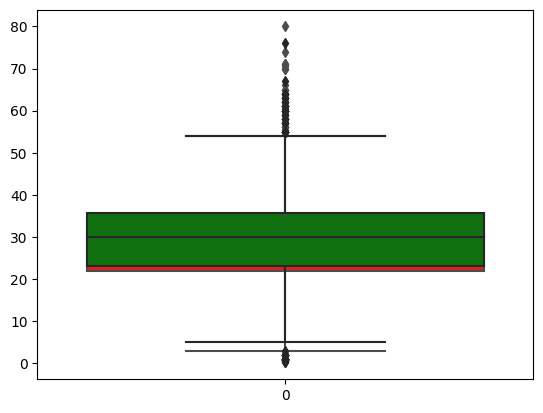

In [370]:
sns.boxplot(train['Age'],color='red')
sns.boxplot(test['Age'],color='green')

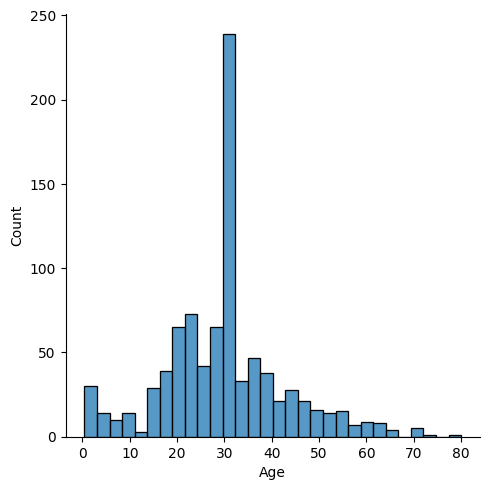

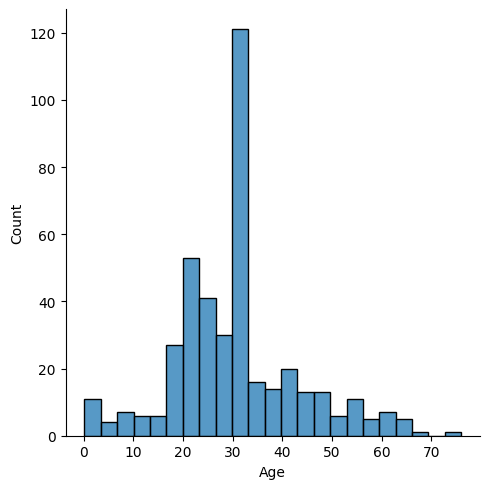

In [371]:
sns.displot(train['Age'])
sns.displot(test['Age'])

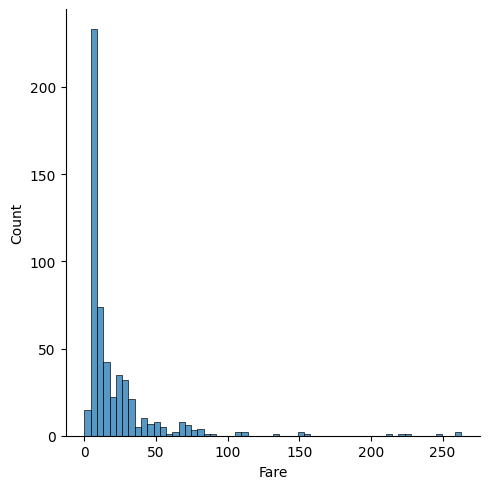

In [372]:
sns.displot(train[train['Survived']==0]['Fare'])

In [373]:
#Feature Selection
train['family']=train['Parch']+train['SibSp']+1
test['family']=test['Parch']+test['SibSp']+1
train.drop(['Name','Parch','SibSp'],axis=1,inplace=True)
test.drop(['Name','Parch','SibSp'],axis=1,inplace=True)

In [374]:
train['family'].value_counts()

family
1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: count, dtype: int64

In [375]:
def family_size(n):
    if n==1:
        return "Alone"
    elif n>1 and n<=5:
        return "Small"
    else:
        return "Large"
train['family_size']=train['family'].apply(family_size)
test['family_size']=test['family'].apply(family_size)
train.drop(['family'],axis=1,inplace=True)
test.drop(['family'],axis=1,inplace=True)

In [385]:
y=train['Survived'].values

In [386]:
train.drop(['Survived'],axis=1,inplace=True)

In [387]:
final=pd.concat([train,test],ignore_index=True)

In [388]:
final.shape

(1309, 8)

In [389]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Sex          1309 non-null   object 
 3   Age          1309 non-null   float64
 4   Ticket       1309 non-null   object 
 5   Fare         1309 non-null   float64
 6   Embarked     1309 non-null   object 
 7   family_size  1309 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 81.9+ KB


In [390]:
final.drop(['PassengerId','Ticket'],axis=1,inplace=True)
final['Sex'] = final['Sex'].map({'female': 0, 'male': 1})
final['family_size']=final['family_size'].map({'Alone':0,'Small':1,'Large':10})
final.drop(['Embarked'],axis=1,inplace=True)

In [391]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pclass       1309 non-null   int64  
 1   Sex          1309 non-null   int64  
 2   Age          1309 non-null   float64
 3   Fare         1309 non-null   float64
 4   family_size  1309 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 51.3 KB


In [392]:
final.isna().sum()

Pclass         0
Sex            0
Age            0
Fare           0
family_size    0
dtype: int64

In [393]:
x=final.head(891).values

In [394]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=101)

In [395]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [396]:
y_pred=clf.predict(x_test)

In [397]:
print("Y-pred shape: ",y_pred.shape)
print("Y-test shape: ",y_test.shape)

Y-pred shape:  (312,)
Y-test shape:  (312,)


In [398]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_pred,y_test)
print(cm)
print("Accuracy: ",accuracy_score(y_pred,y_test))

[[158  45]
 [ 22  87]]
Accuracy:  0.7852564102564102


<Axes: >

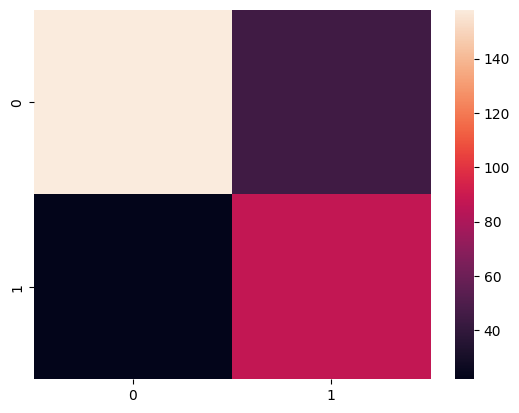

In [402]:
sns.heatmap(cm)